# Train script for RNN VAE model

### imports

In [1]:
%matplotlib inline

from torch.autograd import Variable
from torch import optim
from torch.utils.data import DataLoader
import torch

import sys
sys.path.append("../Modules")
sys.path.append("../ToyDatasets")

# local imports
from train import train
from helpers import kl_loss,nll_loss,mse_loss,kl_loss_multi
from models import RNNVAE
from timeSeries import Sinusoids

## Define dataset loader

In [2]:
batch_size = 256
num_steps = 16
dataset_size = 5000
num_classes = 10

data_loader = DataLoader(Sinusoids(num_steps,virtual_size=dataset_size,quantization=num_classes),batch_size=batch_size,shuffle=True)
valid_data_loader = DataLoader(Sinusoids(num_steps,virtual_size=dataset_size,quantization=num_classes),batch_size=batch_size,shuffle=True)

batch_loader = iter(data_loader)
valid_batch_loader = iter(valid_data_loader)

## Define model

In [3]:
model = RNNVAE(input_size=1,rnn_size=256,latent_size=64,output_size=num_classes,use_softmax=True)
print("Number of trainable parameters {}".format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

# test forward pass
try:
    initial_batch = batch_loader.next()
    x = Variable(initial_batch).type(torch.FloatTensor).transpose(1,0)
    test,_ = model(x)
    assert (test.shape[0] == x.shape[0] and test.shape[1] == x.shape[1] and test.shape[2] == num_classes)
    print("Forward pass succesfull")
except:
    print("Error in forward pass. Output should have shape: {} but had {}".format(x.contiguous().view(-1).shape,test.view(-1).shape))

Number of trainable parameters 598798
Forward pass succesfull


## Define optimizer and loss

In [4]:
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(),lr=learning_rate,weight_decay=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode="min",factor=0.5,verbose=True,cooldown=5)

## Run trainer


Train (100 10%) loss: 1.9585 r_loss: 1.9552 kl: 6.7876
Valid (100 10%) loss: 1.9194 r_loss: 1.9157 kl: 7.3805

Train (200 20%) loss: 1.6375 r_loss: 1.6287 kl: 17.6623
Valid (200 20%) loss: 1.5752 r_loss: 1.5657 kl: 18.8174

Train (300 30%) loss: 1.4554 r_loss: 1.4435 kl: 23.6730
Valid (300 30%) loss: 1.4654 r_loss: 1.4526 kl: 25.5376

Train (400 40%) loss: 1.3616 r_loss: 1.3459 kl: 31.5110
Valid (400 40%) loss: 1.3504 r_loss: 1.3347 kl: 31.4990

Train (500 50%) loss: 1.3394 r_loss: 1.2607 kl: 31.4857
Valid (500 50%) loss: 1.2961 r_loss: 1.2198 kl: 30.5160

Train (600 60%) loss: 1.3818 r_loss: 1.2698 kl: 24.8826
Valid (600 60%) loss: 1.3922 r_loss: 1.2657 kl: 28.0992

Train (700 70%) loss: 1.3219 r_loss: 1.1710 kl: 23.2176
Valid (700 70%) loss: 1.3948 r_loss: 1.2537 kl: 21.7057

Train (800 80%) loss: 1.3809 r_loss: 1.2374 kl: 16.8787
Valid (800 80%) loss: 1.4284 r_loss: 1.2656 kl: 19.1500

Train (900 90%) loss: 1.4537 r_loss: 1.2661 kl: 17.8636
Valid (900 90%) loss: 1.4613 r_loss: 1.29

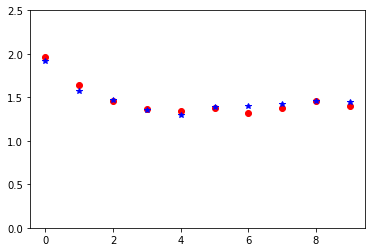

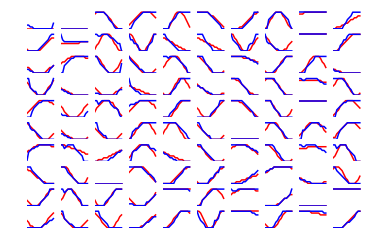

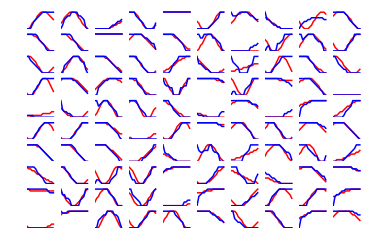

In [6]:
# use at least 50 iterations to get good results
train(data_loader,dataset_size,valid_batch_loader,model,optimizer,scheduler,nll_loss,kl_loss,n_iters=50,use_softmax=True,print_every=1)

In [8]:
#torch.save(model.state_dict(),"Saved_models/RNNVAE_nll.pt")